In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.datasets import load_wine

In [2]:

# Se crean los datos

wine = load_wine()

X = pd.DataFrame(wine['data'], columns=wine['feature_names'])

Y = wine['target']

# np.random.seed(0)
# X = np.r_[np.random.randn(70, 2) - [2, 2], np.random.randn(70, 2) + [2, 2]]
# Y = [0] * 70 + [1] * 70

In [3]:
#Se estima el modelo

from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear')

scores = cross_val_score(clf, X, Y, cv=10)

clf.fit(X,Y)

print(sum(scores)/len(scores))

0.9555555555555557


In [4]:
# Se construye la recta que separa las clases
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]
print(a)

xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
print(clf.intercept_[0])

[ 0.87461779  0.58503036  1.30902151 -0.20533851  0.00791175 -0.02648721
  0.28527624  0.25120071 -0.14808979  0.4932976  -0.16508321  0.55177441
  0.00439753]
-1.4949955646201092
-19.840084762049116


In [5]:
# support vectors

b = clf.support_vectors_[0]


yy_down = a * xx + (b[1] - a * b[0])

b = clf.support_vectors_[-1]

yy_up = a * xx + (b[1] - a * b[0])

TypeError: ignored

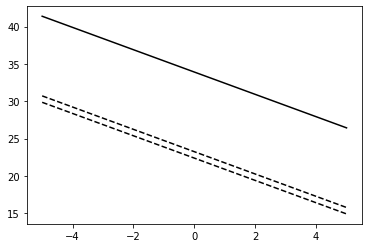

In [6]:
#Gráfica
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

#plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.title('Recta separadora')
plt.show()